In [35]:
#风速风向转换
import pandas as pd
import numpy as np

def calculate_wind_speed_and_direction(u, v):
    # 计算风速
    wind_speed = np.sqrt(u**2 + v**2)

    # 计算风向（弧度）
    wind_direction_rad = np.arctan2(v, u)  # atan2(u, v)返回的是相对于北方向的角度

    # 调整风向使其从北方向开始计算，风向范围为 0° 到 360°
    wind_direction_deg = (270 - np.degrees(wind_direction_rad)) % 360

    return wind_speed, wind_direction_deg

# 读取 CSV 文件
input_file = '/home/Task15_W_Zone9.csv'  # 假设输入文件名为 'wind_data.csv'
df = pd.read_csv(input_file)

# 创建两个新列，计算风速和风向
df['Wind Speed (m/s)100'], df['Wind Direction (°)100'] = zip(*df.apply(lambda row: calculate_wind_speed_and_direction(row['U100'], row['V100']), axis=1))

# 将结果保存到新的 CSV 文件
output_file = 'wind9_data.csv'  # 输出文件名
df.to_csv(output_file, index=False)

print(f"转换后的数据已保存到 {output_file}")


转换后的数据已保存到 wind9_data.csv


In [48]:
import pandas as pd

# 加载CSV文件
data = pd.read_csv('/home/wind9_data.csv')

# 查看数据的前几行，检查列名和数据类型
print(data.head())

# 将时间戳列转换为日期时间格式
data['TIMESTAMP'] = pd.to_datetime(data['TIMESTAMP'])

# 将数据按照时间顺序排序
data.sort_values('TIMESTAMP', inplace=True)
data_2012 = data[(data['TIMESTAMP'].dt.year == 2012)]

# 选择相关列
data_selected = data_2012[['TARGETVAR', 'Wind Speed (m/s)100', 'Wind Direction (°)100']]

# 检查是否有缺失值
print(data_selected.isnull().sum())

# 如果有缺失值，可以选择填充或删除缺失值
data_selected = data_selected.dropna()  # 删除含有缺失值的行

# 将处理后的数据保存到新的CSV文件
data_selected.to_csv('/home/clusterinput9_2012.csv', index=False)

data_scaled = data_selected
#不再进行标准化


   ZONEID      TIMESTAMP  TARGETVAR       U10       V10      U100      V100  \
0       9  20120101 1:00        0.0  1.903254 -1.495002  2.516723 -2.078063   
1       9  20120101 2:00        0.0  2.173296 -0.643641  2.837109 -1.006914   
2       9  20120101 3:00        0.0  2.312744  0.136595  3.034096 -0.015490   
3       9  20120101 4:00        0.0  2.217565  0.797156  2.941829  0.823531   
4       9  20120101 5:00        0.0  1.900598  1.285656  2.559177  1.471102   

   Wind Speed (m/s)100  Wind Direction (°)100  
0             3.263777             309.546553  
1             3.010492             289.540198  
2             3.034135             270.292518  
3             3.054924             254.361017  
4             2.951869             240.108243  
TARGETVAR                0
Wind Speed (m/s)100      0
Wind Direction (°)100    0
dtype: int64


In [49]:
from sklearn.cluster import DBSCAN

# 初始化DBSCAN聚类器，eps是最大距离，min_samples是每个簇的最小样本数
db = DBSCAN(eps=2.1974, min_samples=50)

# 进行聚类
data_2012['cluster'] = db.fit_predict(data_scaled)

# 查看每个样本的聚类结果

# 保存聚类结果到 'cluster#.csv' 文件
data_2012.to_csv('clusterresult9.csv', index=False)

print("聚类结果已保存到csv")


聚类结果已保存到csv


/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


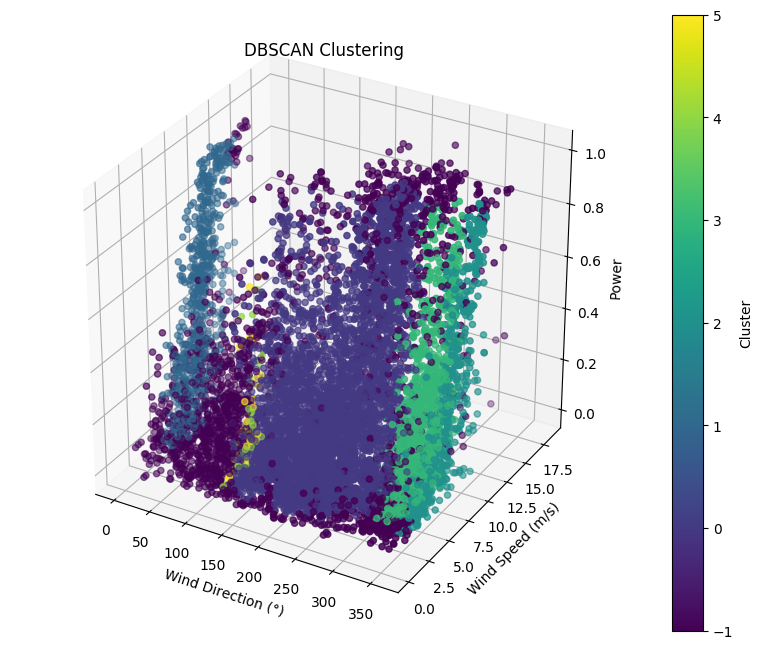

簇 0 包含 4634 个数据点
簇 -1 包含 1880 个数据点
簇 3 包含 872 个数据点
簇 1 包含 689 个数据点
簇 2 包含 601 个数据点
簇 4 包含 69 个数据点
簇 5 包含 38 个数据点

数据被分为 7 个簇（包括噪声点作为一个簇）


In [40]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# 设置字体为 Times New Roman
plt.rcParams['font.family'] = 'Times New Roman'

# 创建3D图形
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# 绘制三维散点图
scatter = ax.scatter( data_2012['Wind Direction (°)100'],data_2012['Wind Speed (m/s)100'], data_2012['TARGETVAR'], c=data_2012['cluster'], cmap='viridis')

# 设置轴标签
ax.set_xlabel('Wind Direction (°)')
ax.set_ylabel('Wind Speed (m/s)')
ax.set_zlabel('Power')

# 显示颜色条
plt.colorbar(scatter, label='Cluster')

# 设置标题
plt.title('DBSCAN Clustering')

# 保存为 SVG 格式
plt.savefig('3d_dbscan_clustering.svg', format='svg')

plt.show()

# === 获取簇的数量 ===
# 获取所有簇的标签，包括噪声点（标签为-1）
clusters = data_2012['cluster']

# 统计每个簇的数量
cluster_counts = clusters.value_counts()

# 输出每个簇的数量，包括噪声点（标签为-1）
for cluster_label, count in cluster_counts.items():
    print(f"簇 {cluster_label} 包含 {count} 个数据点")

# 计算总簇的数量（包括噪声点）
num_clusters = len(cluster_counts)

print(f"\n数据被分为 {num_clusters} 个簇（包括噪声点作为一个簇）")


In [ ]:
# 将 labels 转换为 DataFrame，方便保存为 CSV 文件
labels_df = pd.DataFrame(labels, columns=["Cluster_Label"])

# 将原数据和标签合并
data_with_labels = data_2012.copy()  # 创建数据的副本，避免修改原始数据
data_with_labels['Cluster_Label'] = labels_df  # 将 labels 加到原数据中

# 保存到 CSV 文件
data_with_labels.to_csv('data_with_labels.csv', index=False)

print("聚类标签已保存到 'data_with_labels.csv'")